In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import torch
import feather
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

# local imports
import sys
sys.path.insert(1, '../')
from modules.util.util import window_image, lung_window, mediastinal_window
from modules.dsets import Covid2dSegmentationDataset, TrainingCovid2dSegmentationDataset

In [3]:
# splitter = partial(list_stride_splitter, val_stride=10)

In [4]:
# width_irc = (7,60,60)
# train_ds = TrainingCovid2dSegmentationDataset(splitter=splitter, width_irc=width_irc)
# valid_ds = Covid2dSegmentationDataset(is_valid=True, splitter=splitter)

In [3]:
width_irc = (7,60,60)
lesion_ds = TrainingCovid2dSegmentationDataset(is_valid=None, width_irc=width_irc)
full_ct_ds = Covid2dSegmentationDataset()

2020-11-13 16:32:33,652 INFO     pid:41681 modules.dsets:180:__init__ <class 'modules.dsets.TrainingCovid2dSegmentationDataset'>: general mode, 197 uid's, 4971 index slices, 1237 lesions
2020-11-13 16:32:33,653 INFO     pid:41681 modules.dsets:221:__init__ <class 'modules.dsets.TrainingCovid2dSegmentationDataset'>: (7, 60, 60) width_irc
2020-11-13 16:32:33,675 INFO     pid:41681 modules.dsets:180:__init__ <class 'modules.dsets.Covid2dSegmentationDataset'>: general mode, 197 uid's, 4971 index slices, 1237 lesions


Example CT slice with lesion mask overlay

In [4]:
lesion_ct, lesion_mask, lesion_uid, lesion_index = lesion_ds[0]
lesion_ct = lesion_ct[3:4].squeeze()
lesion_mask = lesion_mask.squeeze()
lesion_uid, lesion_index

('003', 88)

In [5]:
full_ct, full_mask, full_uid, full_index = full_ct_ds[24]
full_ct = full_ct[3:4].squeeze()
full_mask = full_mask.squeeze()
full_uid, full_index

('003', 88)

In [6]:
def overlay(ct,mask):
    ct = ct.clamp(-1000,1000)
    ct /= 2000
    ct += .5
    img = torch.zeros((ct.shape[0], ct.shape[1], 3))
    img[:,:,:] = ct.unsqueeze(-1)
    img[:,:,2] += mask # blue overlay
    img[:,:,2] *= .5
    return img

In [7]:
lesion_img = overlay(lesion_ct, lesion_mask)
full_img = overlay(full_ct, full_mask)

Areas with lesions are highlighted blue

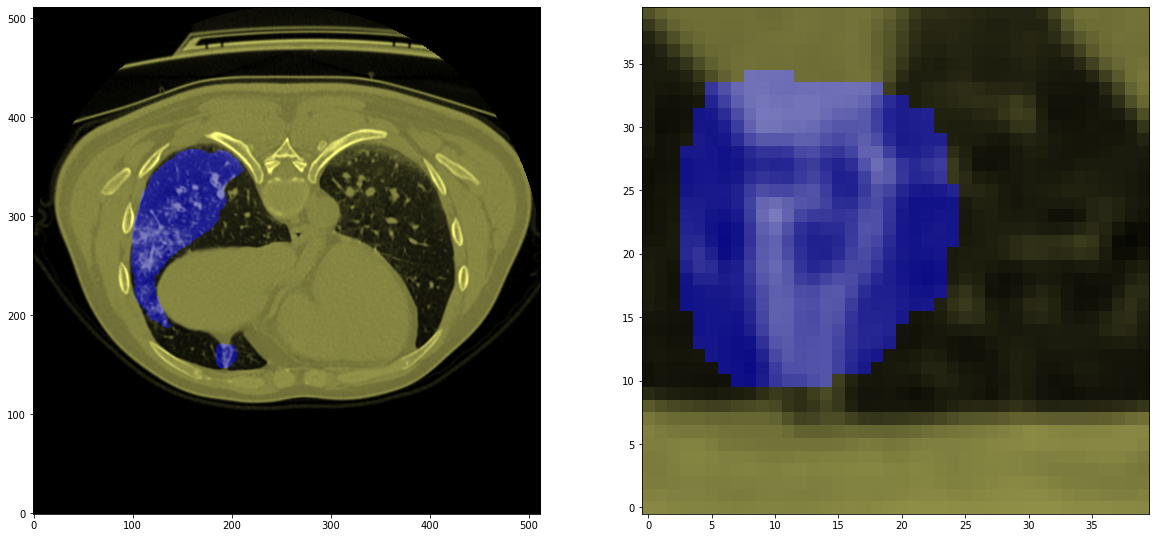

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(full_img, origin="lower")
ax[1].imshow(lesion_img, origin="lower")